In [ ]:
# =================================================
# CELDA 1: DESCARGAR Y PREPARAR DATASET DESDE ROBOFLOW
# =================================================
import os
import yaml

# Asegurarnos de que la librería de Roboflow esté instalada
# (Aunque ya debería estar por requirements.txt, esto no hace daño)
print("--- Verificando instalación de Roboflow... ---")
!pip install -q roboflow

# --- 1. Descargar el dataset directamente al disco de Colab ---
print("\n--- Descargando dataset desde Roboflow... ---")

# rf = Roboflow(api_key="TpjbZATthxPgZ6HtzrBB")
# project = rf.workspace("ange-7vibl").project("og_reciclaje")
# version = project.version(3)
# dataset = version.download("yolov5")


from roboflow import Roboflow
rf = Roboflow(api_key="TpjbZATthxPgZ6HtzrBB")
project = rf.workspace("ange-7vibl").project("og_reciclaje")
version = project.version(4)
dataset = version.download("yolov5")


print("--- Descarga completada. ---")

# --- 2. Corregir automáticamente el archivo data.yaml ---
# La variable 'dataset.location' nos da la ruta a la carpeta descargada (ej: './Og_reciclaje-1')
data_yaml_path = os.path.join(dataset.location, 'data.yaml')

print(f"\n--- Corrigiendo el archivo de configuración: {data_yaml_path} ---")

with open(data_yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Aseguramos que las rutas sean relativas para que YOLO las encuentre
data['train'] = 'train/images'
data['val'] = 'valid/images'
data['test'] = 'test/images'
# Eliminamos la clave 'path' que suele causar problemas de rutas duplicadas
if 'path' in data:
    del data['path']

with open(data_yaml_path, 'w') as f:
    yaml.dump(data, f)

print("--- Archivo data.yaml corregido exitosamente. ---")
print("\n--- ¡Dataset listo para el entrenamiento! ---")

--- Verificando instalación de Roboflow... ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.3 MB/s eta 0:00:00

--- Descargando dataset desde Roboflow... ---
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Og_reciclaje-4 in yolov5pytorch:: 100%|██████████| 99704/99704 [00:14<00:00, 6962.12it/s] 


--- Descarga completada. ---

--- Corrigiendo el archivo de configuración: /content/Og_reciclaje-4/data.yaml ---
--- Archivo data.yaml corregido exitosamente. ---

--- ¡Dataset listo para el entrenamiento! ---


In [1]:
# =================================================
# CELDA 2: PREPARAR EL ENTORNO
# =================================================
from google.colab import drive
import os

# --- Define la ruta de tu proyecto en Google Drive ---
gdrive_project_path = '/content/drive/MyDrive/Aprendizaje/Maestria/Deteccion_reciclaje/'

# --- Monta Google Drive ---
print("--- Montando Google Drive... ---")
drive.mount('/content/drive')

# --- Configura el directorio de trabajo en Colab ---
print("\n--- Configurando el directorio de trabajo... ---")
%cd /content
workspace_dir = "yolov8_training_final"
if not os.path.exists(workspace_dir):
    os.makedirs(workspace_dir)
%cd {workspace_dir}
print(f"Directorio de trabajo actual: {os.getcwd()}")

# --- Copia los archivos y la carpeta 'utils' directamente ---
print(f"\n--- Copiando archivos del proyecto desde: {gdrive_project_path} ---")

# 1. Copia los archivos individuales
!cp "{gdrive_project_path}"{{train_colab.py,validator.py,best.pt,requirements.txt}} .

# 2. Copia la carpeta 'utils' de forma recursiva
!cp -r "{gdrive_project_path}utils" .

# --- Instala las dependencias ---
print("\n--- Instalando dependencias... ---")
!pip install -r requirements.txt -q

print("\n--- ¡Entorno listo! ---")

--- Montando Google Drive... ---
Mounted at /content/drive

--- Configurando el directorio de trabajo... ---
/content
/content/yolov8_training_final
Directorio de trabajo actual: /content/yolov8_training_final

--- Copiando archivos del proyecto desde: /content/drive/MyDrive/Aprendizaje/Maestria/Deteccion_reciclaje/ ---

--- Instalando dependencias... ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.5 MB/s eta 0:00:00
   ━━━

In [ ]:
# =================================================
# CELDA 3: INICIAR ENTRENAMIENTO Y GUARDAR TODOS LOS RESULTADOS
# =================================================
import os

# --- 1. Define las rutas ---
# La ruta de tu proyecto en Google Drive
gdrive_project_path = '/content/drive/MyDrive/Aprendizaje/Maestria/Deteccion_reciclaje/'

# El nombre de la carpeta de la ejecución actual (para el comando de entrenamiento)
run_name = "og_reciclaje_finetuning_optimizado"

# La carpeta local que contiene TODOS los entrenamientos de Colab
local_parent_dir_to_save = "runs/colab_trains"

# El destino en Drive donde se guardará la carpeta 'colab_trains'
drive_save_destination = os.path.join(gdrive_project_path, "runs")

# --- 2. Ejecuta el script de entrenamiento ---
print("--- Iniciando el entrenamiento... ---")
# La variable data_yaml_path viene de la Celda 2
!python train_colab.py \
    --data_yaml "{data_yaml_path}" \
    --model best.pt \
    --epochs 20 \
    --run_name "{run_name}" \
    --save_dir "{local_parent_dir_to_save}" # Guardamos dentro de esta carpeta

# --- 3. Copia la carpeta completa de resultados a Google Drive ---
print(f"\n--- Entrenamiento completado. Copiando la carpeta '{local_parent_dir_to_save}' a: {drive_save_destination} ---")

# Creamos el directorio de destino en Drive si no existe (ej: .../runs/)
!mkdir -p "{drive_save_destination}"

# Usamos cp -r para copiar la carpeta completa
# Esto creará .../runs/colab_trains/ en tu Drive
!cp -r "{local_parent_dir_to_save}" "{drive_save_destination}"

print("\n--- ¡Historial completo de entrenamientos guardado en Google Drive exitosamente! ---")

--- Iniciando el entrenamiento... ---
--- Iniciando el lanzador de entrenamiento de Colab ---
Llamando a la función de entrenamiento con los siguientes parámetros:
  - Archivo de datos: /content/Og_reciclaje-4/data.yaml
  - Modelo inicial: best.pt
  - Directorio del proyecto: runs/colab_trains
  - Nombre de la ejecución: og_reciclaje_finetuning_optimizado
  - Épocas: 20
----------------------------------------------------
Usando dispositivo: cuda
Cargando modelo desde: best.pt
Iniciando el entrenamiento avanzado de YOLOv8...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Og_reciclaje-4/data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynami

In [ ]:
import os

# Definir la ruta base

runs_path = 'runs/colab_trains'

print("Explorando la estructura de archivos...")
print(f"Ruta base: {runs_path}")
print("-" * 50)

# Listar todo lo que hay en runs/colab_trains
if os.path.exists(runs_path):
    for root, dirs, files in os.walk(runs_path):
        level = root.replace(runs_path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 2 * (level + 1)
        for file in files:
            print(f"{subindent}{file}")
            # Buscar específicamente archivos de TensorBoard
            if file.startswith('events.out.tfevents'):
                print(f"{subindent}  ← ¡Archivo de TensorBoard encontrado!")
else:
    print(f"La carpeta {runs_path} no existe.")

Explorando la estructura de archivos...
Ruta base: runs/colab_trains
--------------------------------------------------
colab_trains/
  og_reciclaje_finetuning_optimizado/
    BoxF1_curve.png
    BoxR_curve.png
    val_batch0_pred.jpg
    train_batch7030.jpg
    results.csv
    BoxP_curve.png
    val_batch1_labels.jpg
    train_batch7031.jpg
    train_batch1.jpg
    args.yaml
    confusion_matrix_normalized.png
    train_batch7032.jpg
    labels.jpg
    val_batch2_labels.jpg
    val_batch2_pred.jpg
    BoxPR_curve.png
    results.png
    val_batch1_pred.jpg
    confusion_matrix.png
    val_batch0_labels.jpg
    labels_correlogram.jpg
    train_batch0.jpg
    train_batch2.jpg
    weights/
      best.pt
      last.pt


In [ ]:
# # Cargar la extensión de TensorBoard
# %load_ext tensorboard

# # Definir la ruta a tu carpeta de entrenamiento
# # ¡Ajusta esta ruta según tu estructura en Google Drive!

# # Lanzar TensorBoard
# %tensorboard --logdir runs/colab_trains


--- results.png ---


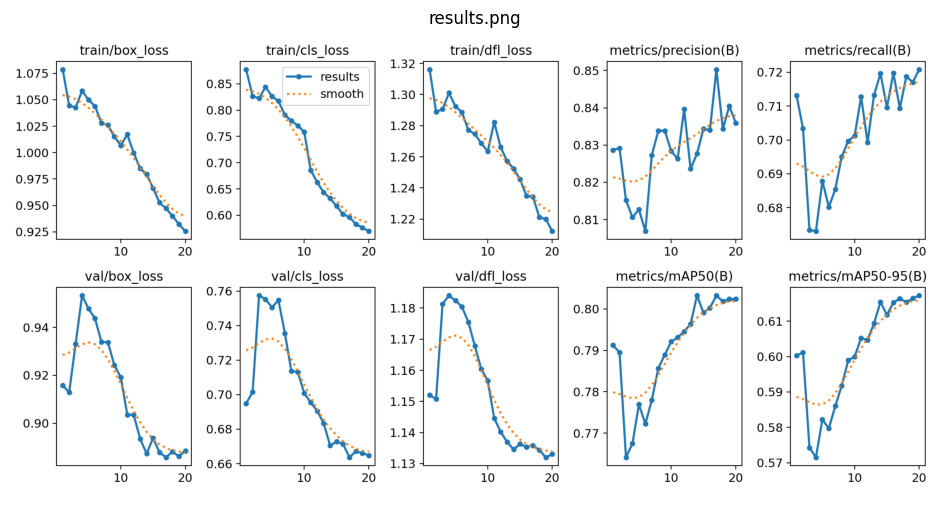


--- confusion_matrix.png ---


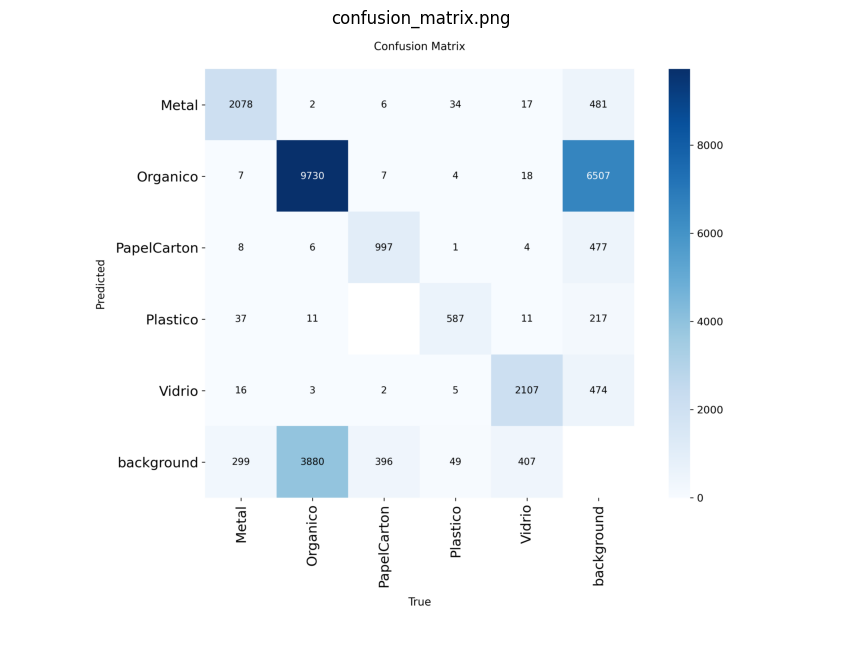


--- BoxF1_curve.png ---


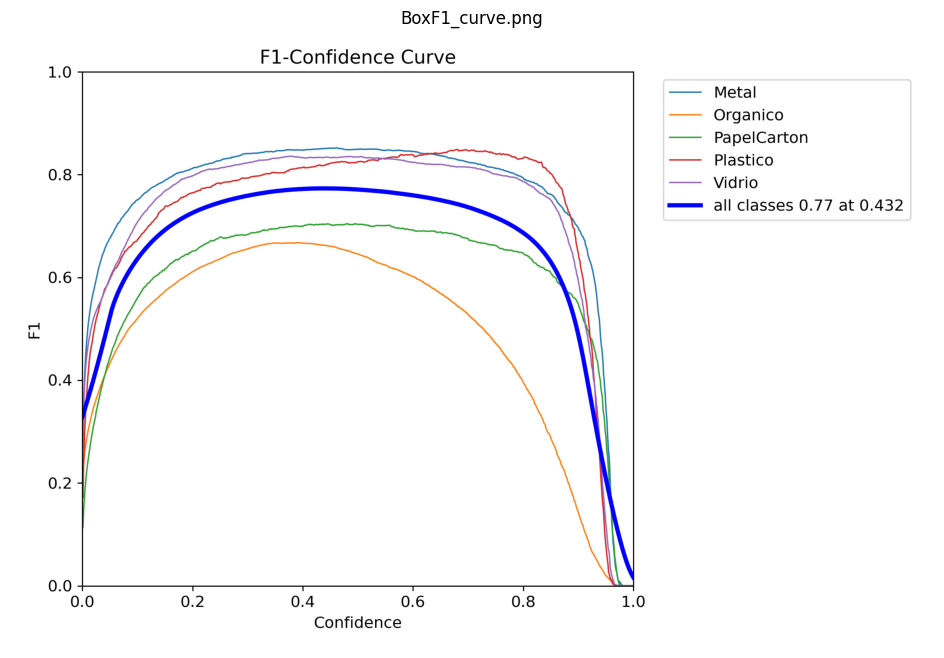


--- BoxP_curve.png ---


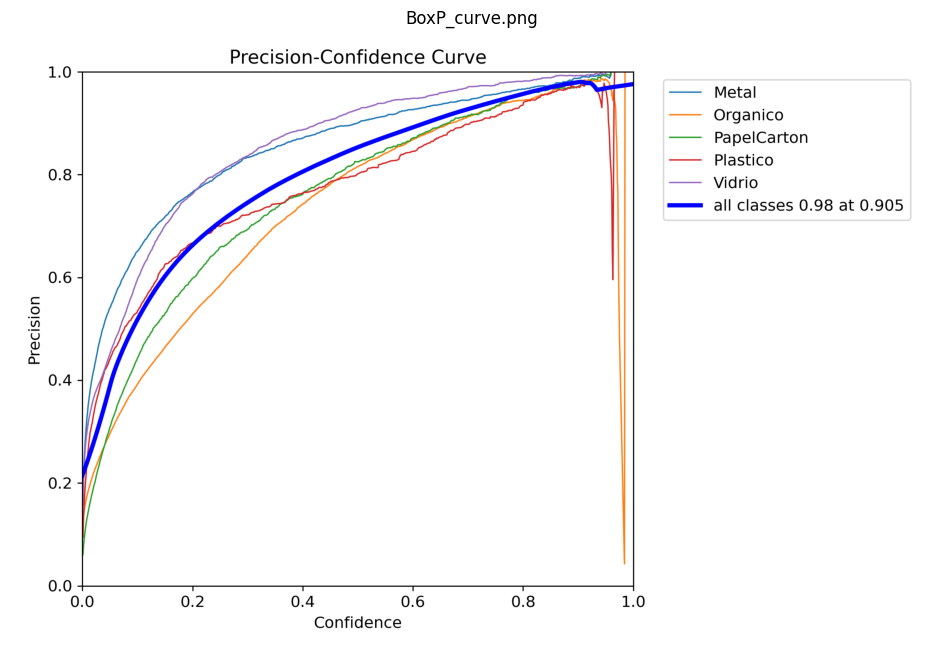

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Ruta a tu carpeta de entrenamiento
training_path = 'runs/colab_trains/og_reciclaje_finetuning_optimizado/'

# Lista de imágenes importantes a mostrar
images_to_show = ['results.png', 'confusion_matrix.png', 'BoxF1_curve.png', 'BoxP_curve.png']

# Mostrar cada imagen
for img_name in images_to_show:
    img_path = training_path + img_name
    if os.path.exists(img_path):
        print(f"\n--- {img_name} ---")
        img = mpimg.imread(img_path)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name)
        plt.show()
    else:
        print(f"No se encontró: {img_name}")

In [ ]:
gdrive_project_path = '/content/drive/MyDrive/Aprendizaje/Maestria/Deteccion_reciclaje/'
!cp -r "{gdrive_project_path}runs" .

In [ ]:
print("--- Iniciando validación del modelo entrenado... ---")
# La variable data_yaml_path viene de la Celda 2
!python validator.py \
  --model_path runs/colab_trains/og_reciclaje_finetuning_optimizado/weights/best.pt \
  --data_yaml "{data_yaml_path}" \
  --save_dir runs/validation

--- Iniciando validación del modelo entrenado... ---
--- Iniciando el lanzador de validación de Colab ---
Cargando modelo desde la clase ModelValidator...
Modelo cargado exitosamente.

--- INICIANDO VALIDACIÓN EN EL CONJUNTO 'VAL' ---
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 152MB/s]
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1355.3±251.2 MB/s, size: 34.6 KB)
val: Scanning /content/Og_reciclaje-4/valid/labels... 3496 images, 2 backgrounds, 0 corrupt: 100% 3496/3496 [00:02<00:00, 1553.90it/s]
val: New cache created: /content/Og_reciclaje-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 20729. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed